In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_theme(style="whitegrid")


In [13]:
meddata = pd.read_csv('medical_examination.csv')

In [14]:
meddata.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [15]:
meddata.shape

(70000, 13)

In [17]:
meddata.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

#### Adding an over weight column

In [25]:
# Calculating BMI column
height_metre = meddata.height / 100  # converting height from cm to metres 
meddata['bmi'] = round(meddata['weight'] / height_metre.pow(2),1) # BMI = weigh(kg) / height(m) ** 2

In [29]:
meddata['overweight'] = np.where(meddata.bmi > 25, 1, 0)

In [30]:
meddata

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,22.0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.9,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.5,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.7,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,26.9,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,50.5,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,31.4,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,27.1,1


### Normalizing the data to 0 & 1 

In [53]:
# Normalize Values to 0 and 1 for 'gluc' and 'cholesterol' columns 
meddata['gluc'] = np.where(meddata['gluc'] == 1, 0, 1)
meddata['cholesterol'] = np.where(meddata.cholesterol > 1, 1, 0)

In [60]:
# Melting the data from wide format to a long format for Count plot
meddata_cat = meddata.melt(id_vars=['cardio'], 
                 value_vars = ['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])

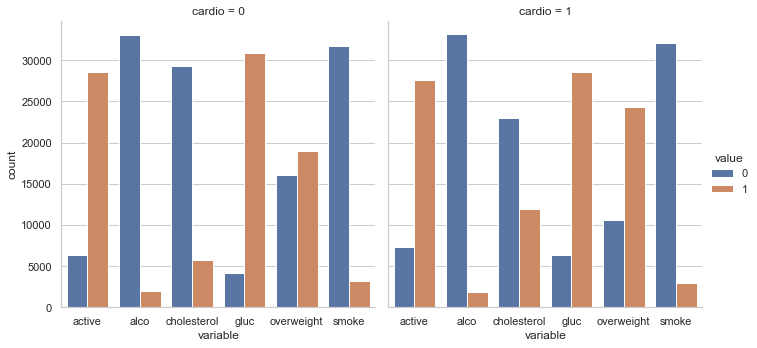

In [63]:
 g = sns.catplot(x="variable", kind = "count", data=meddata_cat, hue = 'value', col= 'cardio')

### Data Cleaning and Normalizing 

In [65]:
# Filtering out incorrect data 
meddata_heat = meddata[(meddata['ap_lo'] <= meddata['ap_hi'])
    & (meddata['height'] >= meddata['height'].quantile(0.025))
    & (meddata['height'] <= meddata['height'].quantile(0.975)) 
    & (meddata['weight'] >= meddata['weight'].quantile(0.025))
    & (meddata['weight'] <= meddata['weight'].quantile(0.975))]

<AxesSubplot:>

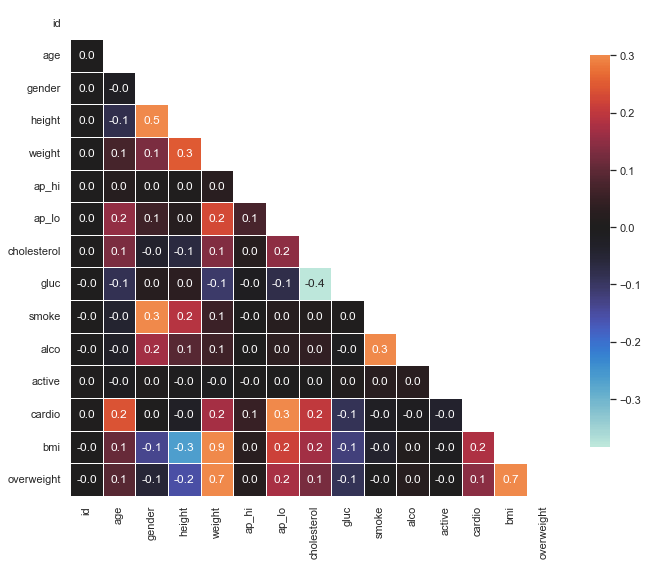

In [74]:
# Calculating the corelation matrix
corr = meddata_heat.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with 'sns.heatmap()'
sns.heatmap(corr, mask=mask, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .8}, annot=True, fmt=".1f")
